In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
df.shape

(10000, 11)

In [5]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [6]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [7]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
df.Gender.unique()

array([1, 0], dtype=int64)

In [8]:
Location = pd.get_dummies(df['Geography'])
merged = pd.concat([df,Location],axis='columns')
merged.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
final = merged.drop(['Geography','Spain'],axis='columns')
final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1


In [10]:
final.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               uint8
Germany              uint8
dtype: object

In [11]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final[cols_to_scale] = scaler.fit_transform(final[cols_to_scale])

In [13]:
for col in final:
    print(f'{col}: {final[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [14]:
X = final.drop('Exited',axis='columns')
y = final['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [15]:
X_train.shape

(8000, 11)

In [16]:
X_test.shape

(2000, 11)

In [17]:
X_train[:5]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0


In [19]:
len(X_train.columns)

11

In [21]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(11,input_shape=(11,),activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
250/250 [==============================] - 4s 4ms/step - loss: 0.5849 - accuracy: 0.6952
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.4814 - accuracy: 0.7960
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.4638 - accuracy: 0.7995
Epoch 4/20
250/250 [==============================] - 1s 5ms/step - loss: 0.4548 - accuracy: 0.8011
Epoch 5/20
250/250 [==============================] - 1s 5ms/step - loss: 0.4473 - accuracy: 0.8074
Epoch 6/20
250/250 [==============================] - 1s 5ms/step - loss: 0.4413 - accuracy: 0.8111
Epoch 7/20
250/250 [==============================] - 1s 4ms/step - loss: 0.4352 - accuracy: 0.8144
Epoch 8/20
250/250 [==============================] - 1s 5ms/step - loss: 0.4321 - accuracy: 0.8155
Epoch 9/20
250/250 [==============================] - 1s 6ms/step - loss: 0.4304 - accuracy: 0.8149
Epoch 10/20
250/250 [==============================] - 1s 5ms/step - loss: 0.4272 - accuracy: 0.8154

In [22]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 1s 6ms/step - loss: 0.4136 - accuracy: 0.8210


[0.4135706126689911, 0.8209999799728394]

In [23]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 1s 4ms/step


array([[0.12119891],
       [0.13944717],
       [0.11592706],
       [0.09847167],
       [0.10733574]], dtype=float32)

In [24]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [25]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [26]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1595
           1       0.60      0.34      0.44       405

    accuracy                           0.82      2000
   macro avg       0.73      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000



Text(69.0, 0.5, 'Truth')

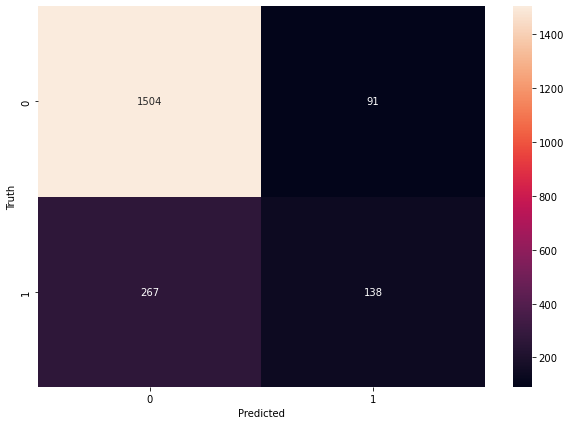

In [29]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')